In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#load the data 
df = pd.read_csv(r"E:\MLIoT\ML\dataset\Wholesale customers data.csv")
df.shape

(440, 8)

In [66]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Data Cleaning

In [67]:
# check for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [68]:
# check for duplicates
df.duplicated().sum()

0

### Clustering - 2 features

In [69]:
df2 = df[['Fresh','Milk']]
df2.head()

,Fresh,Milk
0,12669,9656
1,7057,9810
2,6353,8808
3,13265,1196
4,22615,5410


In [70]:
#scale the values - feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df2_data = sc.fit_transform(df2)
pd.DataFrame(df2_data).head()

,0,1
0,0.052933,0.523568
1,-0.391302,0.544458
2,-0.447029,0.408538
3,0.100111,-0.624020
4,0.840239,-0.052396


In [75]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=5,verbose=True)
model.fit(df2_data)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 438.3702573717754
start iteration
done sorting
end inner loop
Iteration 1, inertia 402.23543197894026
start iteration
done sorting
end inner loop
Iteration 2, inertia 394.4228726793931
start iteration
done sorting
end inner loop
Iteration 3, inertia 390.5523151657678
start iteration
done sorting
end inner loop
Iteration 4, inertia 386.52126321755605
start iteration
done sorting
end inner loop
Iteration 5, inertia 385.7434833191305
start iteration
done sorting
end inner loop
Iteration 6, inertia 384.94630522477377
start iteration
done sorting
end inner loop
Iteration 7, inertia 384.24696225301346
start iteration
done sorting
end inner loop
Iteration 8, inertia 384.1858522617547
start iteration
done sorting
end inner loop
Iteration 9, inertia 384.1858522617547
center shift 0.000000e+00 within tolerance 1.000000e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inert

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=True)

In [76]:
model.cluster_centers_

array([[ 1.68779057, -0.10761111],
       [ 0.05716626,  3.3479732 ],
       [-0.35366401, -0.18028656]])

In [77]:
pd.DataFrame(model.cluster_centers_,columns=df2.columns)

,Fresh,Milk
0,1.687791,-0.107611
1,0.057166,3.347973
2,-0.353664,-0.180287


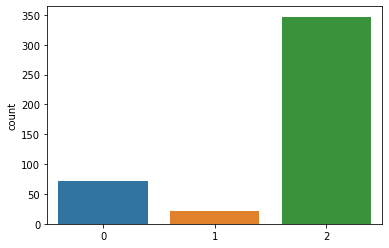

In [78]:
sns.countplot(model.labels_)
plt.show()

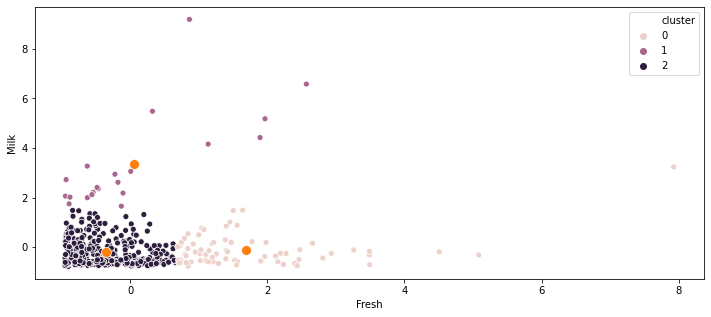

In [63]:
df2_data = pd.DataFrame(df2_data,columns=df2.columns)
df2_data['cluster'] = model.labels_
plt.figure(figsize=(12,5))
sns.scatterplot(x='Fresh',y='Milk',hue='cluster',data=df2_data)
sns.scatterplot(x=model.cluster_centers_[:,0],y=model.cluster_centers_[:,1],s=100)
plt.show()

## Clustering - 6 features

In [79]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [80]:
df3 = df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3_data = sc.fit_transform(df3)

In [81]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, random_state=5)
model.fit(df3_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [82]:
pd.DataFrame(model.cluster_centers_,columns=df3.columns)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.001344,-0.228363,-0.255247,-0.028841,-0.248827,-0.091963
1,3.029404,2.789687,0.891741,4.547364,-0.085354,6.059971
2,-0.340002,1.757437,2.223213,-0.265839,2.278305,0.133716


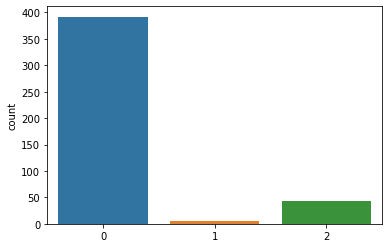

In [83]:
sns.countplot(model.labels_)
plt.show()

### elbow Method

In [93]:
k = []
inertia = []
for i in range(1,20):
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(df3_data)
    inertia.append(model.inertia_)
    k.append(i)

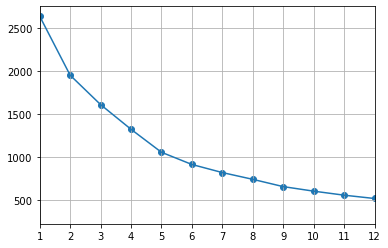

In [95]:
plt.plot(k,inertia)
plt.scatter(k,inertia)
plt.grid(True)
plt.xticks(k)
plt.xlim([1,12])
plt.show()

10